# Programming for Data Analysis - ATU 2022/23

# Project 2

# David Higgins - G00411302

In [315]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn import svm
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as ss

## History of the Wisconsin breast cancer dataset



This dataset is one of a pair created from data collected by Dr. William Wolberg at the University of Wisconsin Hospitals over an almost 3 year time period, from January 1989 to November 1991. The first dataset, known as the original, was the amalgamation of 8 separate groups of data submitted by Dr. Wolberg to the researchers. Each instance contained 11 attributes; an ID number, nine characteristics of the tissue sample and a classification of malignant or benigh. There are 669 instances in total in this dataset. 

The second dataset, known as the diagnostic, will be the subject of this project. This dataset contains the ID number and benign/malignant classification, as well as 10 characteristics of images taken of the samples. The characteristics are digital representations of cell nuclei seen in images taken of a fine needle aspirate (FNA) of a breast mass. The mean, standard error and worst/largest values are calculated for each of the 10 characteristics, giving a total of 32 attributes. This dataset holds 569 instances, with 357 classified as benign and 212 classified as malignant. The 10 characteristics reported are given by the UCI Machine Learning Repository as:

a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

## Literature Review

Agarap (2018) tested 6 different machine learning algorithms on this dataset. The algorithms used were:

1. GRU-SVM
2. Linear Regression
3. Multilayer Perceptron (MLP)
4. Nearest Neighbour (NN) search
5. Softmax Regression
6. Support Vector Machine (SVM)

All 6 algorithms performed favourably, scoring over 90% accuracy on classifying the samples as benign or malignant. Agarap proposed using a neural network architecture using the  gated  recurrent  unit  (GRU)  variant  of  recurrent neural  network  (RNN)  and  the  support  vector  machine  (SVM),  for the purpose of binary classification. The remaining 5 algorithms were existing algorithms used as a comparison to the author's proposed system.

Using a 70/30 train/test split, the following classification accuracy results were achieved:

1. GRU-SVM - 93.75%
2. Linear Regression - 96.09%
3. Multilayer Perceptron (MLP) - 99.04%
4. Nearest Neighbour (NN) search - L1-NN 93.57% L2-NN 94.74%
5. Softmax Regression - 97.66%
6. Support Vector Machine (SVM) - 96.09%

Agarap's algorithm compares very well with the established algorithms. The Multilayer Perceptron algorithm performed exceptionally well at 99.04%. A stronger result was obtained by Umami and Sarno (2020) using a Generalized Linear Model. This study compared the performance of 3 different algorithms on the Wisconsin diagnostic dataset:

1. Generalized Linear Model
2. Logistic Regression
3. Gradient Boosted Decision Tree

This research found the Generalized Linear Model outperformed all other studies noted in that paper, with an accuracy score of 99.4%.


## Summary statistics

We can now begin to examine the dataset itself. The dataset is available from a wide range of sources. For the purposes of this investigation we will load it from the scikit-learn package. When the data is loaded what is actually returned is a Bunch object. This is a collection of objects including a pandas dataframe with the data, a pandas data series containing the target data, lists of attributes and a text description.

In [2]:
#as_frame option generates a pandas dataframe
data = load_breast_cancer(return_X_y=False, as_frame=True) 

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
#data is a Bunch object. We use .frame method to call the actual dataframe
df = data.frame

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


We can see from the count row above that all the data is present, 569 values are showing for each attribute.

## Correlation within the dataset

We can use heatmaps to get an understanding of how the variables are correlated. This will be helpful when generating synthetic data as it will give us an idea if our generated data resembles the relationships of the original dataset.

<AxesSubplot:>

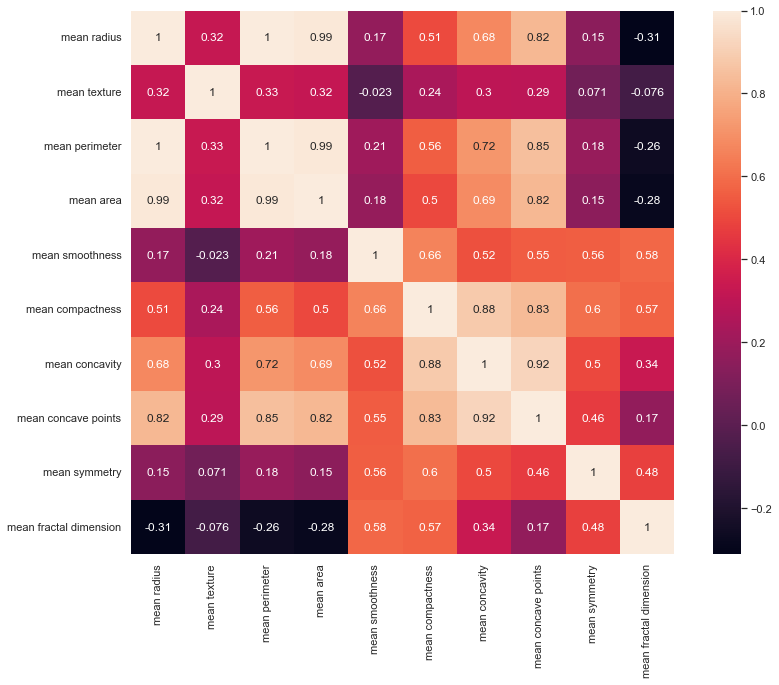

In [7]:
#https://www.kaggle.com/code/djokester/visualising-the-breast-cancer-wisconsin-data-set/notebook
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(df.iloc[:,0:10].corr(), vmax=1, square=True, annot=True)

<AxesSubplot:>

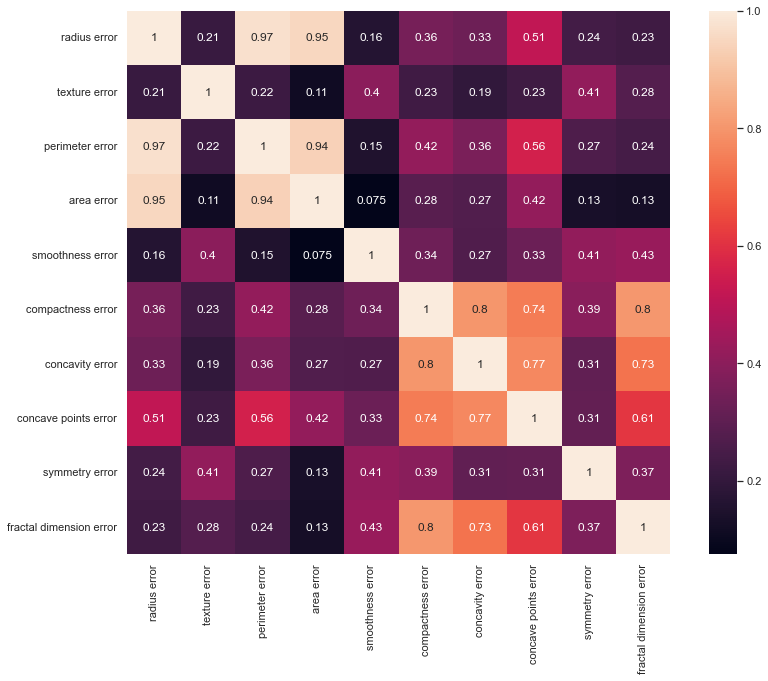

In [8]:
sns.heatmap(df.iloc[:,10:20].corr(), vmax=1, square=True, annot=True)

<AxesSubplot:>

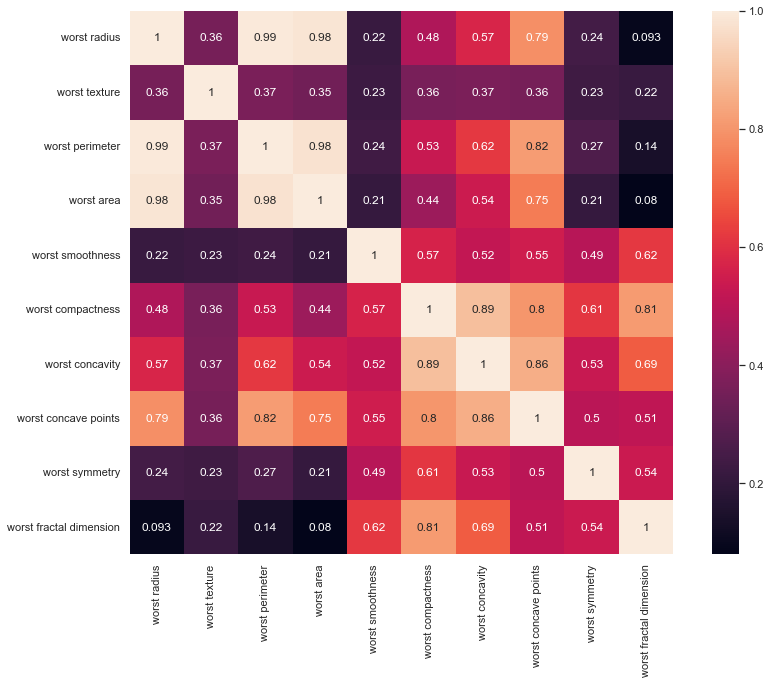

In [9]:
sns.heatmap(df.iloc[:,20:30].corr(), vmax=1, square=True, annot=True)

## Distribution of data

Next we look at the distributions of the data. This will help us develop an understanding of what distributions each variable follows. We expect most to be normally distributed but they may be some that are heavily skewed or more uniform that will require a different distribution to model.

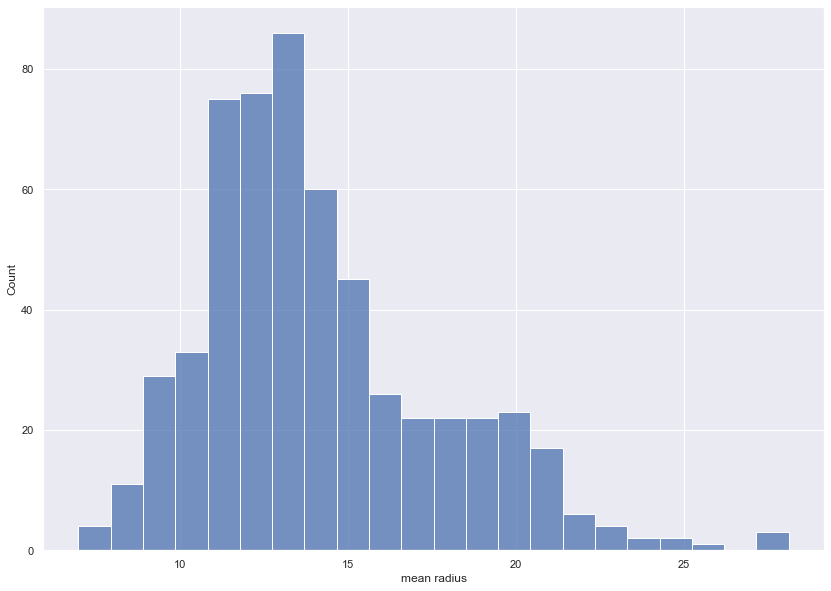

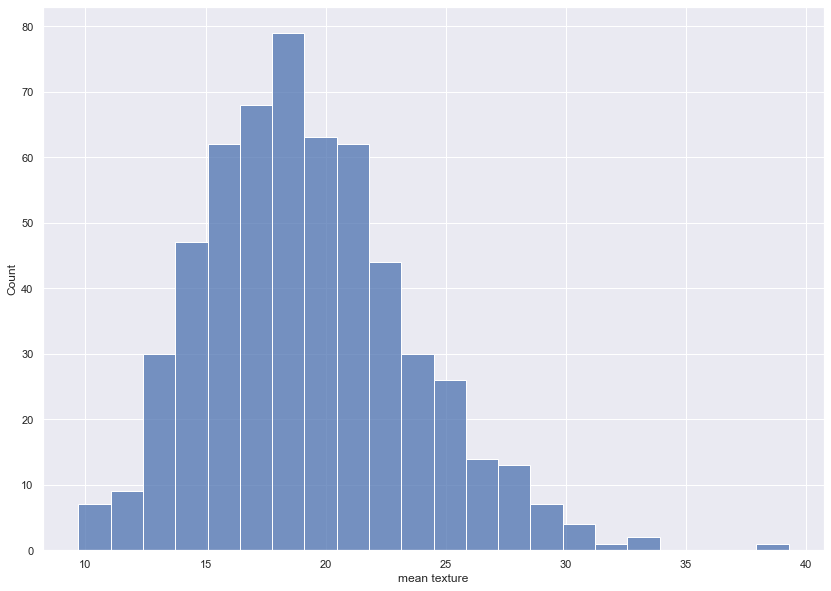

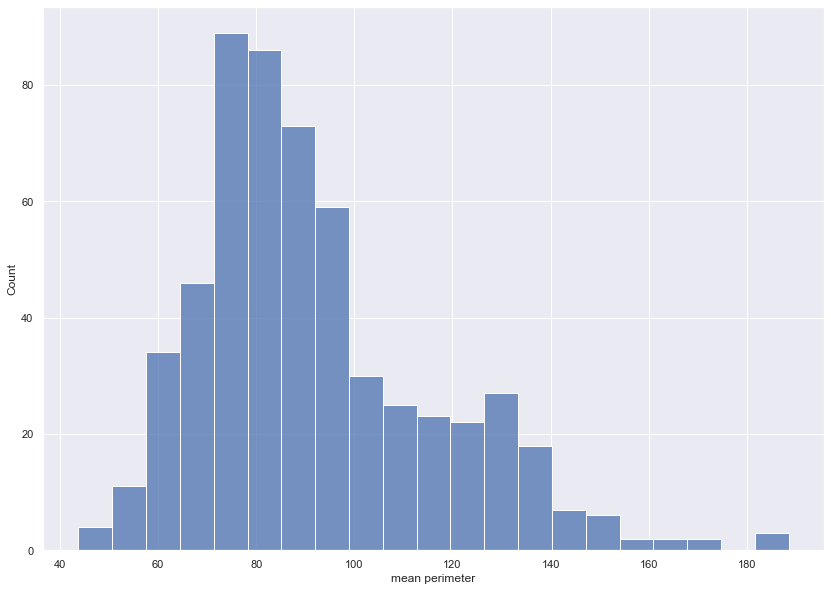

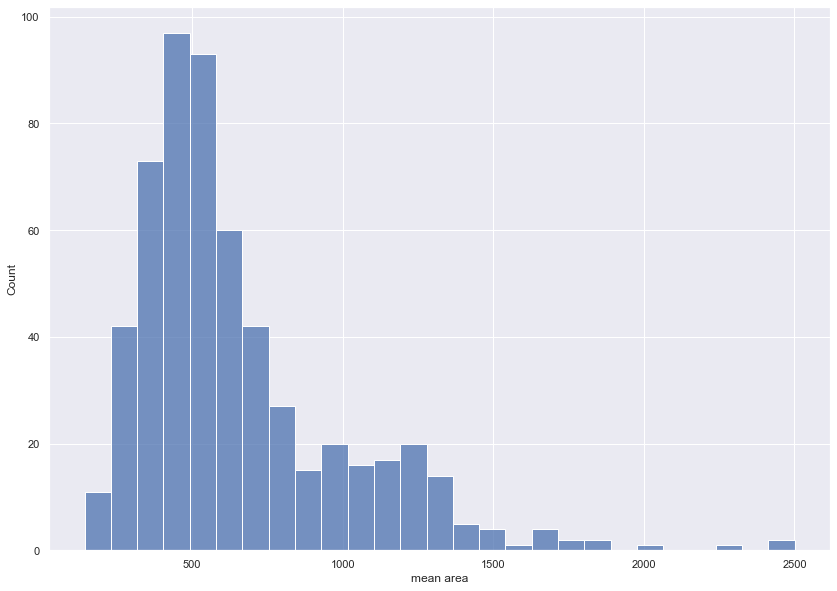

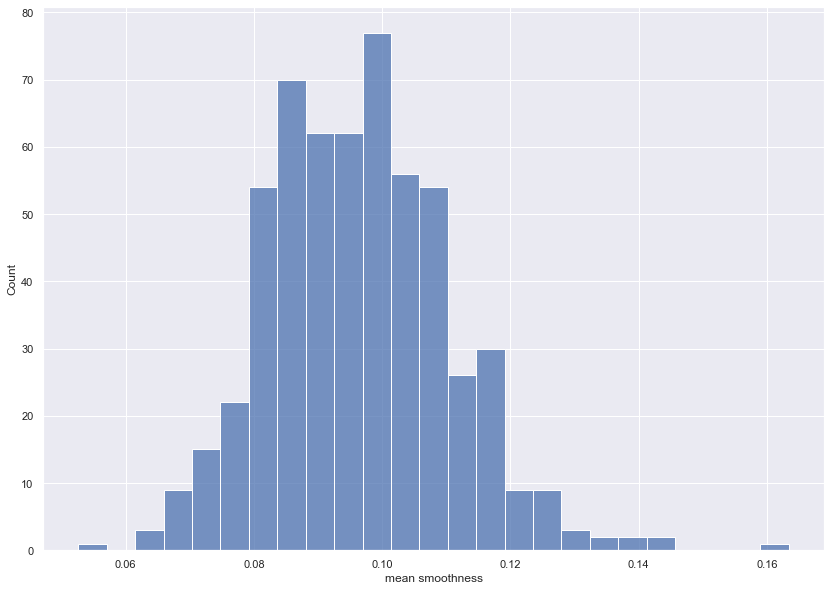

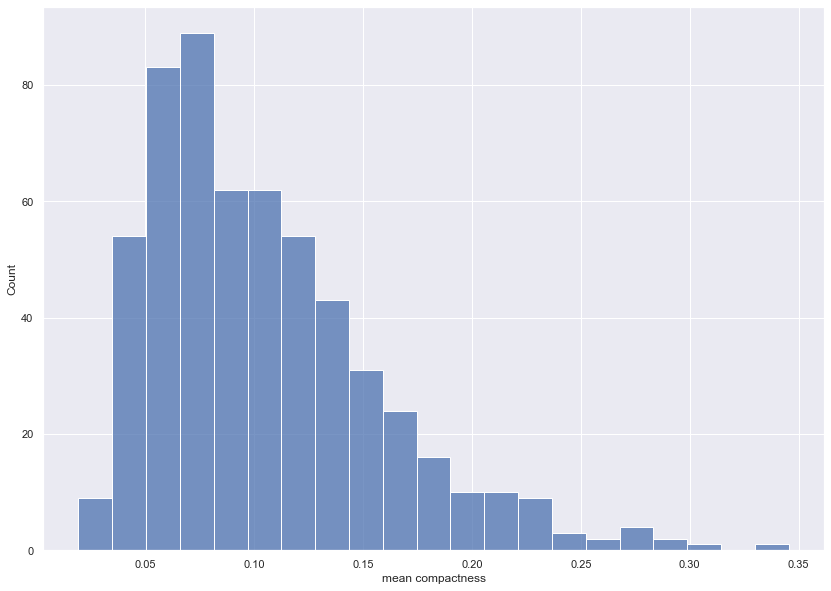

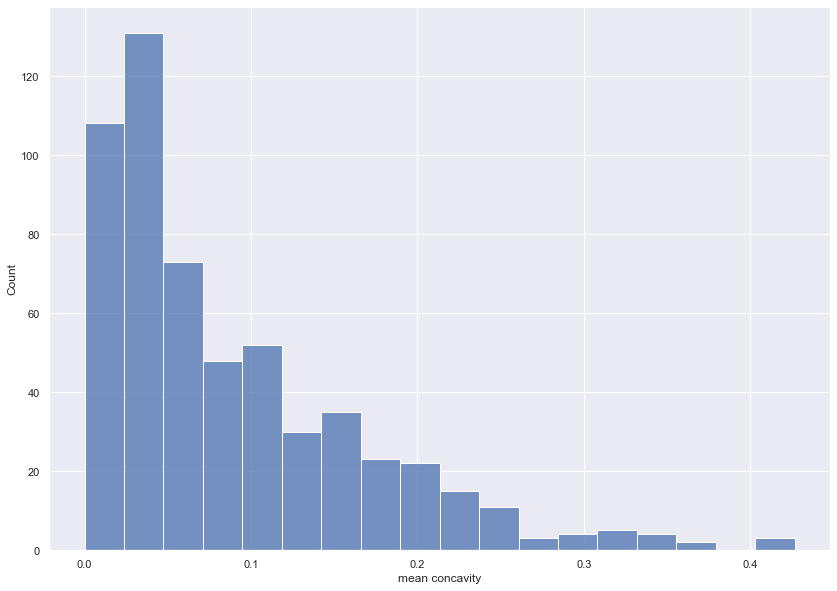

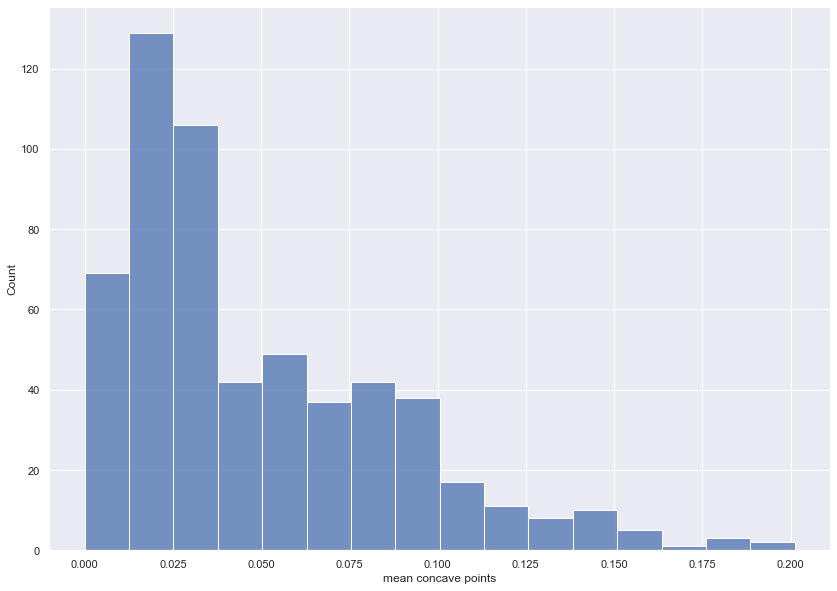

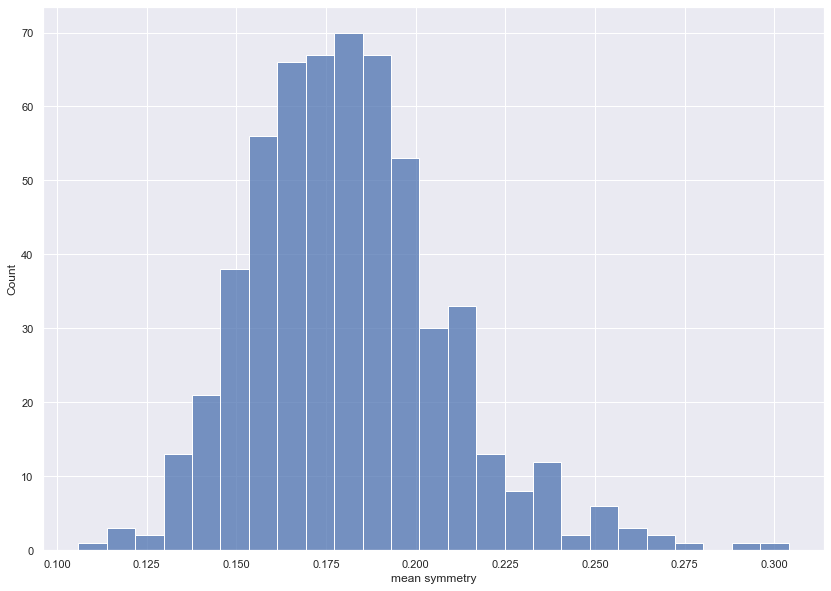

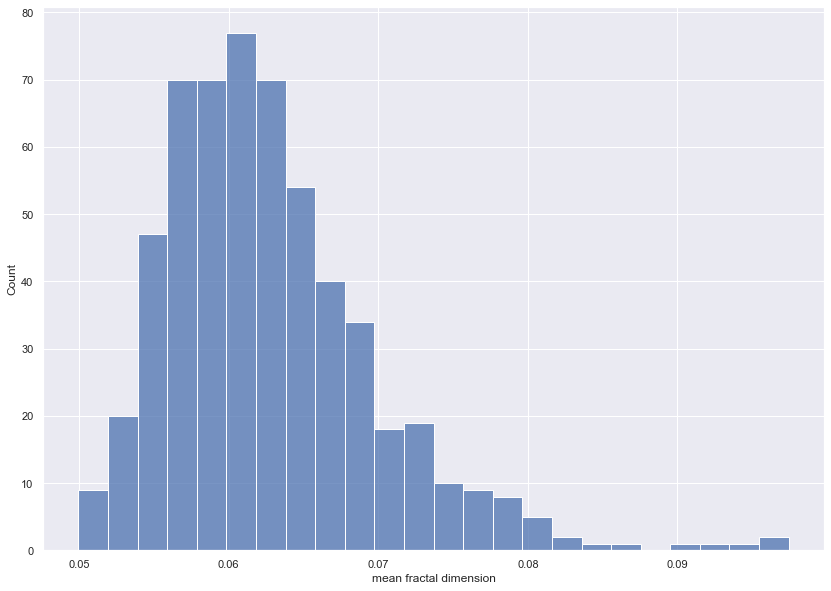

In [10]:
for i in range(0,10):
    plt.figure()
    sns.histplot(df.iloc[:,i])

While most attributes are normally distributed, if a little skewed, compactness, concavity and concave points have a much more skewed distribution. These attributes would be better modelled using a gamma distribution as they follow the same right skew shape as that distribution.

## Outliers

We can now use boxplots to visualise the spread of the data and any outliers. I have included strip plots to help further illustrate how the datapoints are situated within the dataset.

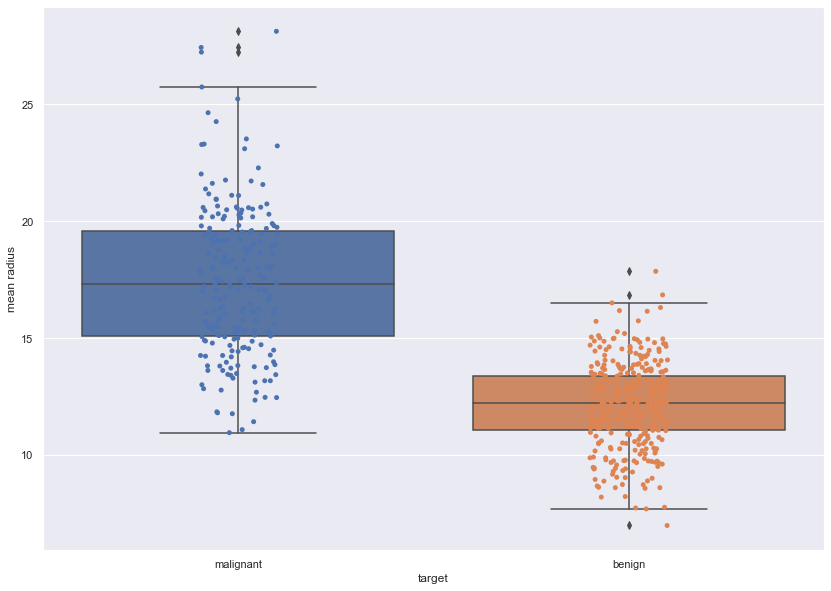

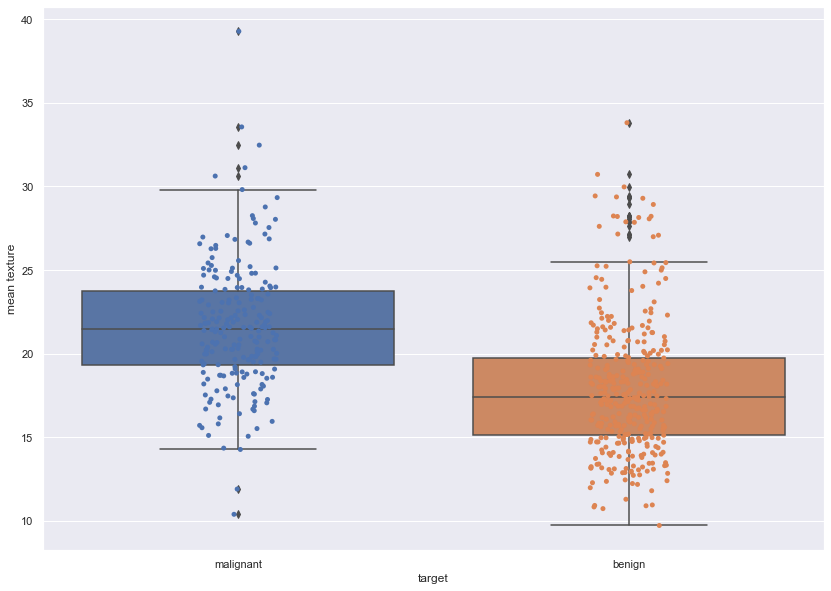

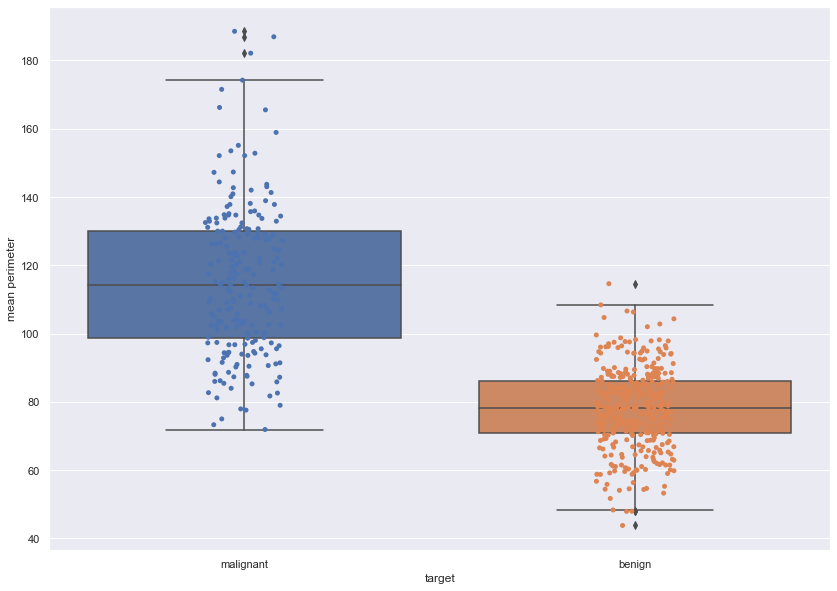

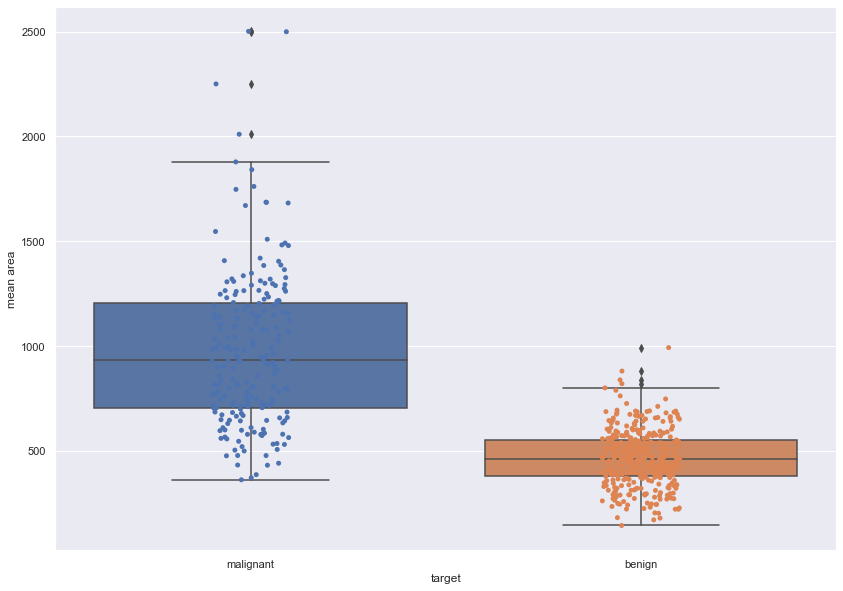

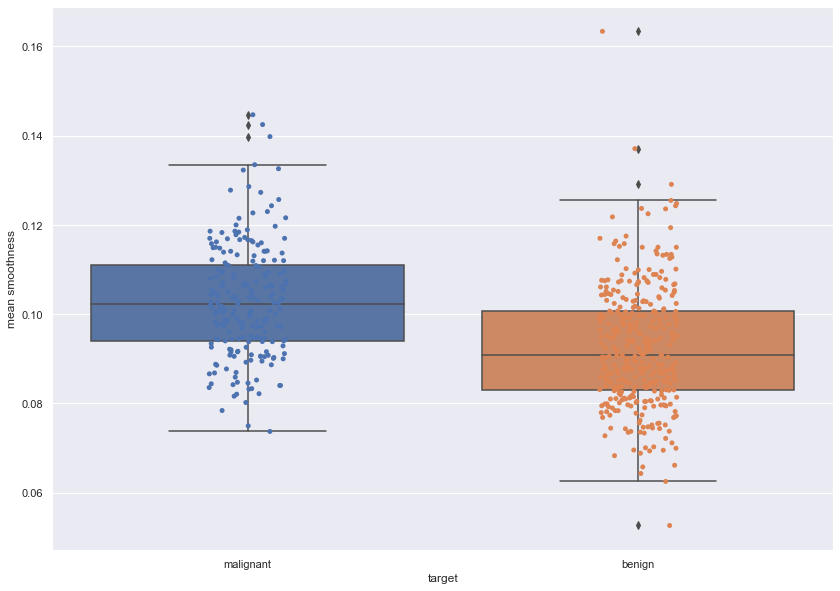

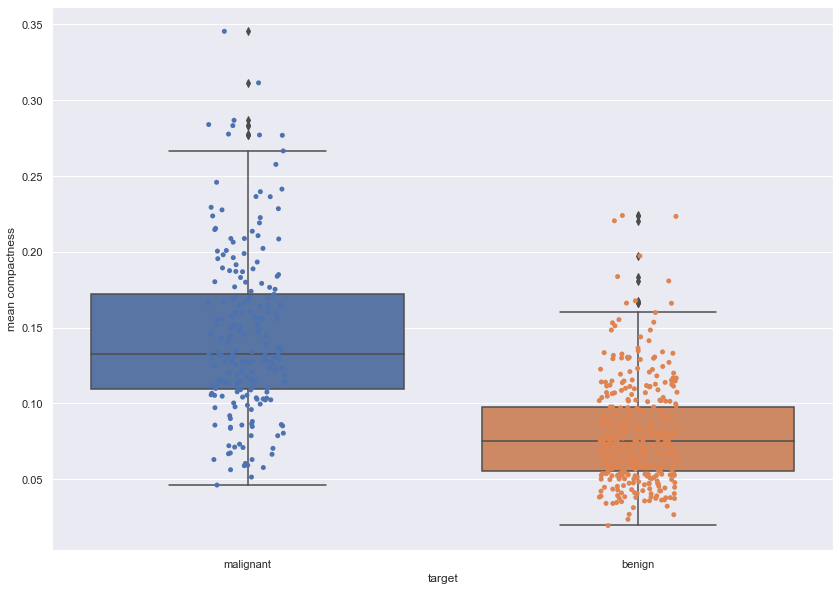

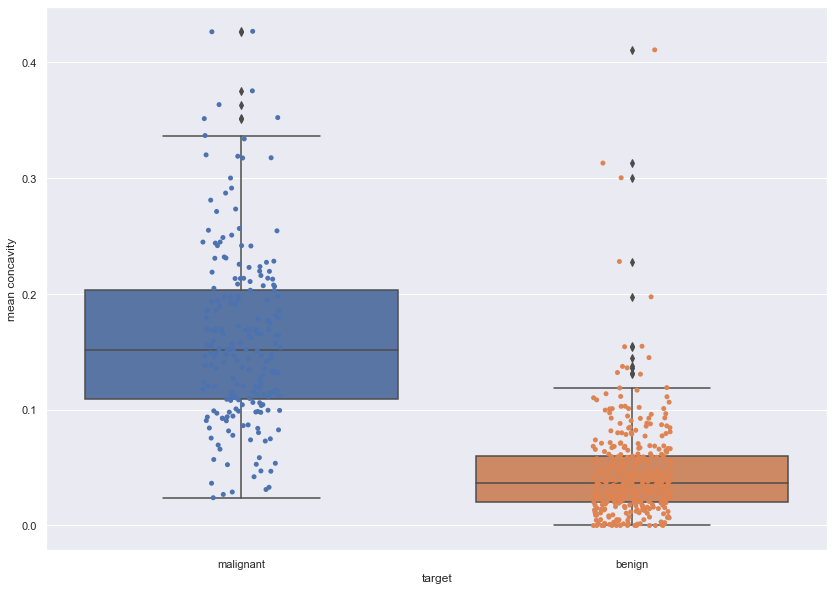

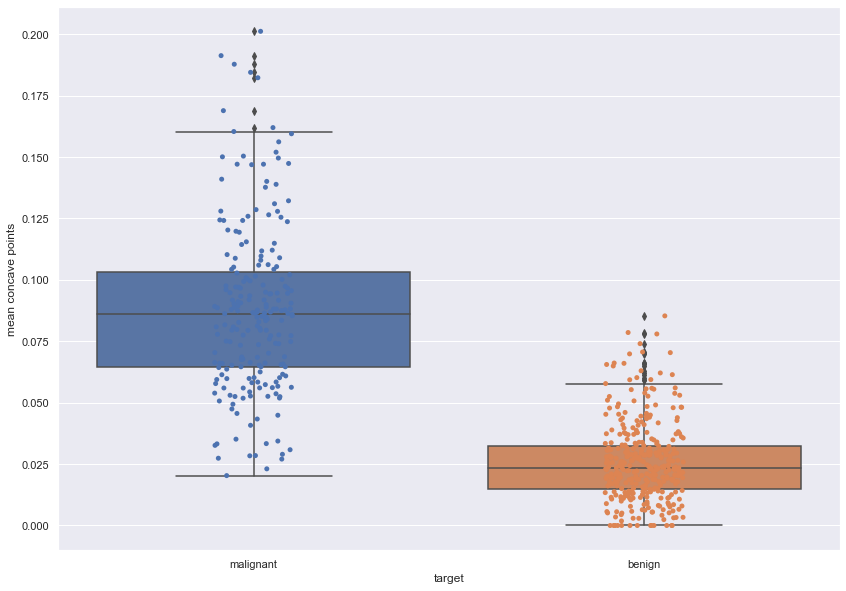

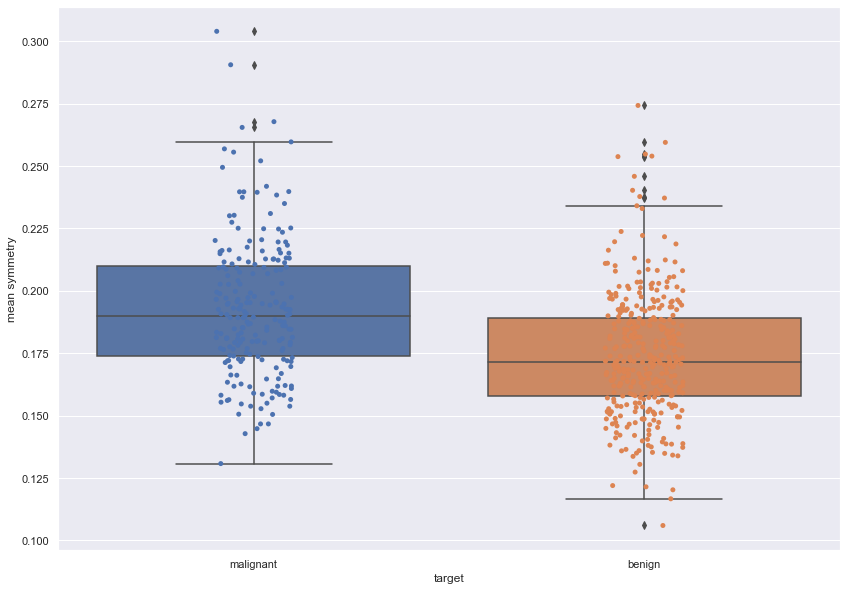

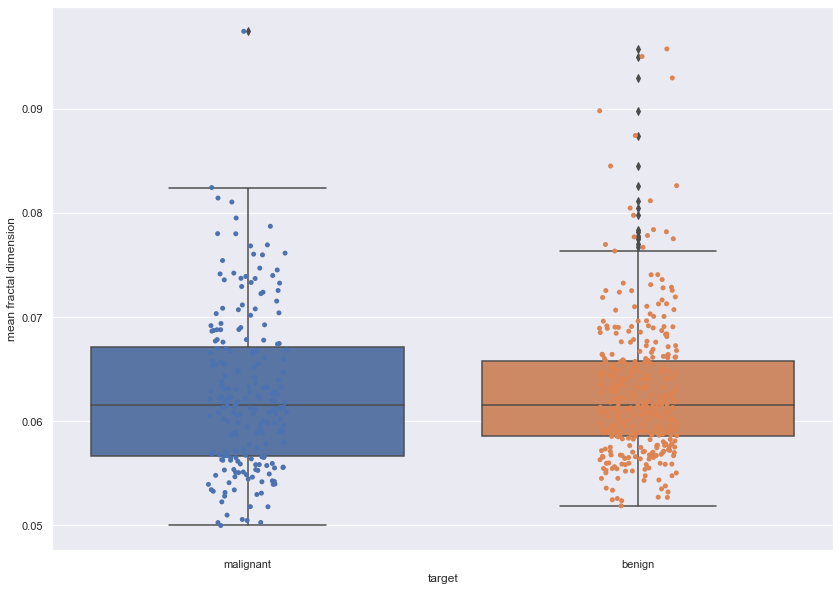

In [11]:
#https://www.kaggle.com/code/djokester/visualising-the-breast-cancer-wisconsin-data-set/notebook
for i in range(0,10):
    plt.figure()
    #sns.stripplot(x=df['target'], y= df.iloc[:,i], jitter=True)
    #sns.boxplot(dataM.iloc[:,i])
    ax=sns.boxplot(x=df['target'],y=df.iloc[:,i])
    ax=sns.stripplot(x=df['target'],y= df.iloc[:,i],jitter=True,edgecolor='gray')
    ax.set_xticklabels(data.target_names)

We will compare 4 different machine learning algorithms using the breast cancer dataset. For the purposes of this test, I have set the test/train split to 30/70. Once each algorithm is coded I will then run 1000 iterations of each test to determine the average accuracy and stability. The 4 algorithms chosen are K nearest neighbours, Perceptron, Support Vector Machines and Decision Tree. 

## K Nearest Neighbours

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7)

In [13]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
print(neigh.predict(X_test))

[0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0
 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1]


In [15]:
print(np.array(y_test))

[0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0
 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1]


Next, we compare the predictions and the actual results from the dataset (y_test). By subtracting one Numpy array from the other, any differences between the arrays will show as either -1 or 1. Squaring the resulting array makes all the differences positive 1.

In [16]:
x = ((neigh.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]


We can now count the number of errors in the predictions and the number of elements in the test dataset.

In [17]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 13.
The number of elements in the test dataset is 171.


Using the figures in the previous cell, we can calculate the test accuracy.

In [18]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the K Nearest Neighbours model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the K Nearest Neighbours model is 92.4%


In [19]:
acc = []
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    x = ((neigh.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    acc.append(testAccuracy)

In [20]:
result = np.array(acc)

In [21]:
print('The average accuracy is {}%'.format(round(result.mean(),4)*100))
print('The average standard deviation is {}'.format(round(result.std(),4)*100))

The average accuracy is 93.17999999999999%
The average standard deviation is 1.78


<AxesSubplot:ylabel='Count'>

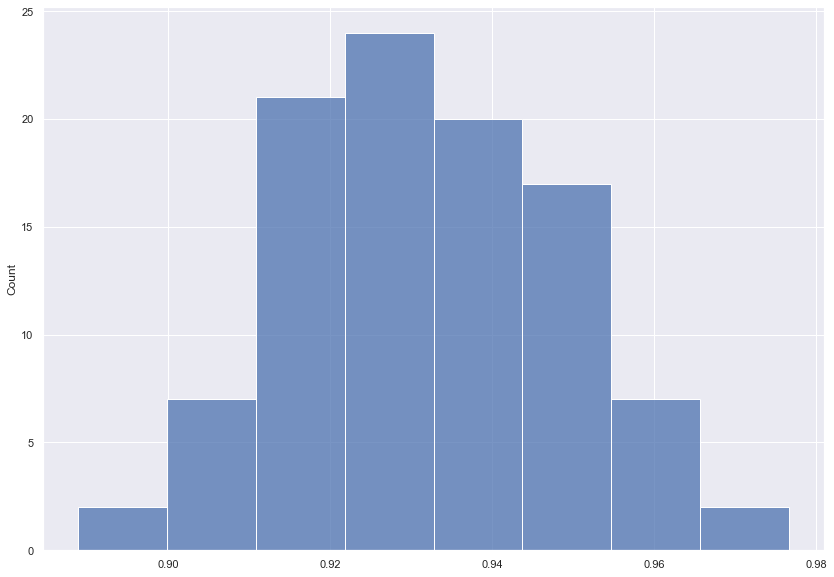

In [22]:
sns.histplot(result)

## Perceptron 

In [23]:
clf = Perceptron(tol=1e-3, random_state=0)

In [24]:
clf.fit(X_train, y_train)

Perceptron()

In [25]:
clf.score(X_test, y_test)

0.6432748538011696

In [26]:
percep = []
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    percep.append(score)
    
perResult = np.array(percep)

In [27]:
print('The average accuracy is {}%'.format(round(perResult.mean(),4)*100))
print('The average standard deviation is {}'.format(round(perResult.std(),4)*100))

The average accuracy is 84.23%
The average standard deviation is 10.66


<AxesSubplot:ylabel='Count'>

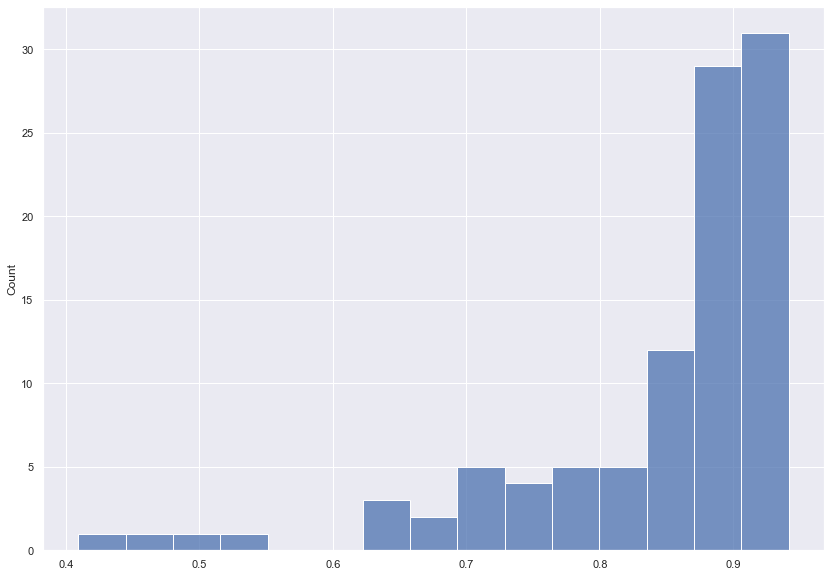

In [28]:
sns.histplot(perResult)

## Support Vector Machines

In [29]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [30]:
clf.predict(X_test)

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
print(np.array(y_test))

[1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1]


In [32]:
x = ((clf.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0]


In [33]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 13.
The number of elements in the test dataset is 171.


In [34]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the Support Vector Machines model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the Support Vector Machines model is 92.4%


In [35]:
svmList = []
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    x = ((clf.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    svmList.append(testAccuracy)

In [36]:
svmResult = np.array(svmList)

In [37]:
print('The average accuracy is {}%'.format(round(svmResult.mean(),4)*100))
print('The average standard deviation is {}%'.format(round(svmResult.std(),4)*100))

The average accuracy is 91.14999999999999%
The average standard deviation is 2.06%


<AxesSubplot:ylabel='Count'>

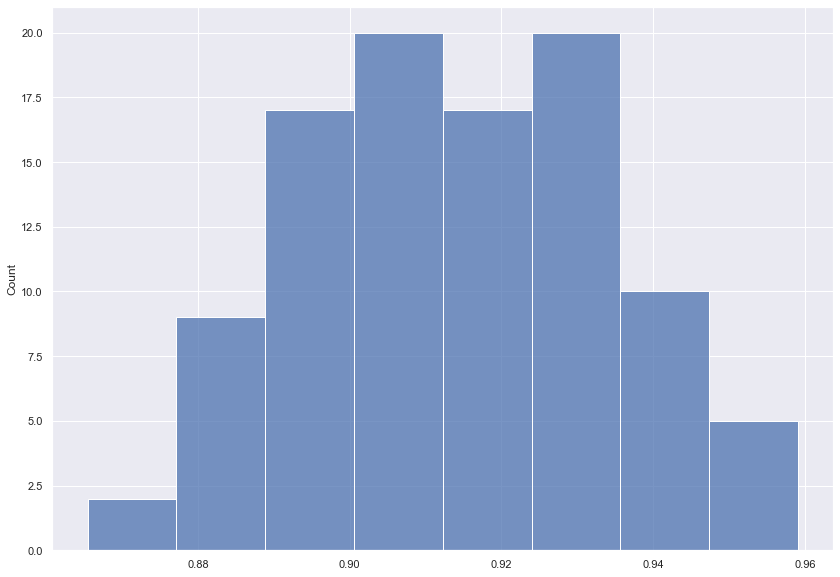

In [38]:
sns.histplot(svmResult)

## Decision Tree

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [40]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [41]:
x = ((clf.predict(X_test)-np.array(y_test))**2)
print(x)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
print('The number of errors in the predictions is {}.'.format(sum(x)))
print('The number of elements in the test dataset is {}.'.format(len(x)))

The number of errors in the predictions is 9.
The number of elements in the test dataset is 171.


In [43]:
testAccuracy = 1 - (sum(x)/len(x))
print('The accuracy of the Decision Tree model is {}%'.format(round(testAccuracy,4)*100))

The accuracy of the Decision Tree model is 94.74000000000001%


In [44]:
dtList = []
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, train_size=0.7, shuffle=True)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, y_train)
    x = ((clf.predict(X_test)-np.array(y_test))**2)
    testAccuracy = 1 - (sum(x)/len(x))
    dtList.append(testAccuracy)

In [45]:
dtResult = np.array(dtList)

In [46]:
print('The average accuracy is {}%'.format(round(dtResult.mean(),4)*100))
print('The average standard deviation is {}%'.format(round(dtResult.std(),4)*100))

The average accuracy is 92.67999999999999%
The average standard deviation is 1.94%


<AxesSubplot:ylabel='Count'>

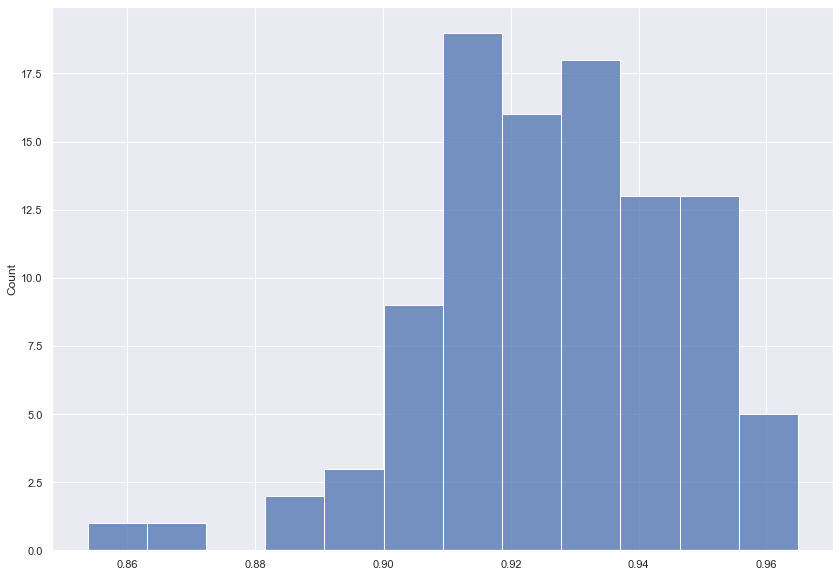

In [47]:
sns.histplot(dtResult)

The K nearest neighbours, Decision Tree and Support Vector Machines performed reasonably well and with almost identical accuracy. The Perceptron performed noticeably poorer, with a significantly larger standard deviation. While the study examined earlier had a lot of success with the Multilayer Perceptron, the standard Perceptron would require much adjustment before it could be considered reliable. 

## Synthetic data

The dataset could be extended using synthetic data to increase the size of the training set. More data points could refine the model's accuracy. In our previous investigations into machine learning algorithms on the Wisconsin dataset we used a 70/30 train/test split. A more precise determination of the accuracy of the algoritms could be determined with a larger test set but this would come at the expense of the training set. A larger overall dataset would help balance these two requirements.  
    
As the different attributes are linked to various degrees, the first step in generating a synthetic dataset is to examine in more detail the heatmaps created during our initial exploration. 

<AxesSubplot:>

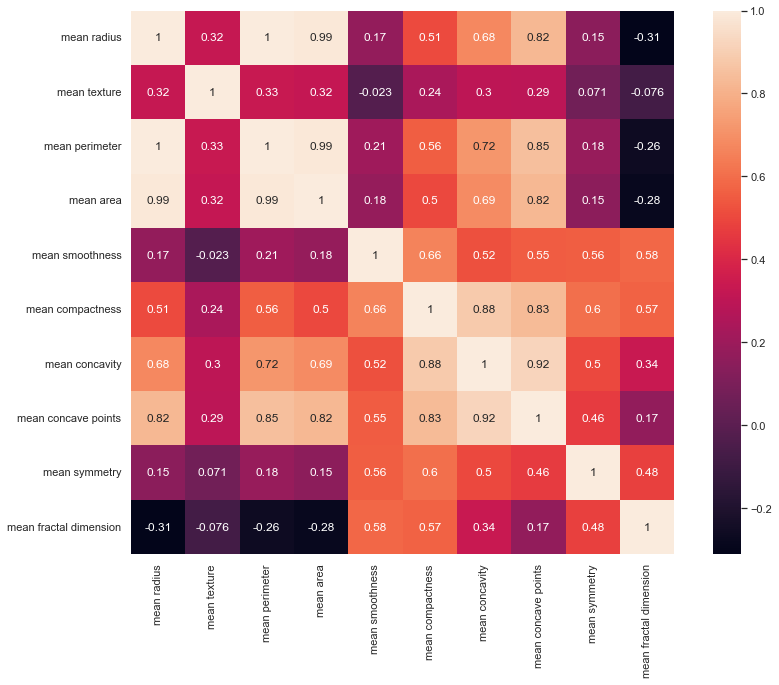

In [49]:
sns.heatmap(df.iloc[:,0:10].corr(), vmax=1, square=True, annot=True)

We can see near perfect correlation between mean radius, mean perimeter and mean area. This is to be expected and provides a relatively straightforward relationship to begin data generation. Our histogram of the mean radius distribution shows a relatively normally distributed set with a slight right skew. It would be adequately modelled using Numpy's random number generator function and normal method. We can use the mean and standard deviation of the diagnostic set as our parameters for the synthesised dataset. We can then use the resulting synthetic data to generate the perimeter and area data.

In [50]:
rng = np.random.default_rng()

In [247]:
#mean radius - normal distribution
rad = rng.normal(df.iloc[:,0].mean(), df.iloc[:,0].std(), 569)
print(rad)

[21.15820136 18.74316113  9.11374192 14.16367881 15.2135467  11.70350515
 16.57947282 12.2814411  17.81578196  7.07708523 17.19091388 14.33329432
 15.62512735 11.6745362  10.13042883  8.71288696 16.16958344 12.64047496
 16.54859422 14.84191105 15.28340002 22.34358592 18.92533367 13.37209848
 14.22307841 20.49532343 11.05138933 11.87373038 15.32687603  6.75747357
 13.69456562 16.43187252  8.25830916 18.19889976 14.906534   11.66948983
  7.87426712 12.85573848 16.43514318 14.84620474 10.49800036 17.38032662
  7.38742529 12.95721977 19.72381208 14.66273581 19.38758214 11.46293949
 11.3586044  15.07057374  9.49544287 13.79738373 18.10149225 13.49034622
 12.33400226 10.1568982  13.25059751 12.78157968 13.64401121 16.73337131
 23.56096736 14.50354622 22.52632102 16.47768289 14.31011618 13.74750055
 13.5404849  12.78247707 18.93938314 14.86817596 14.9658821  13.05717693
 11.97544915 10.80983037 12.21336518 15.05861437 16.18893716 15.30004253
  7.39258865 18.28635745 16.05240129 13.68639571 18

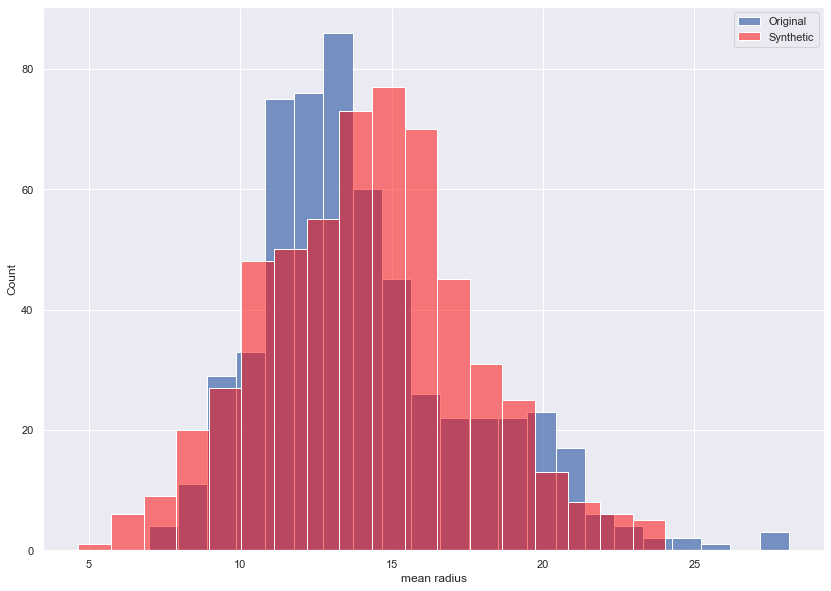

In [251]:
plt.figure()
sns.histplot(df.iloc[:,0])
sns.histplot(rad, color='red', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

By using the histogram to compare the distributions of the original and synthetic data, we can see if the synthetic data is a reasonable extension of the original. Small variations in the data may cause large differences as we generate more sets of data from this first synthetic set. The histograms will be a good guide to see if a scaling or position factor needs to be added to it. In our case it appears to match the original set of data well. The mean of the synthetic is slightly higher but not excessively so. We can use a line of best fit to determine the equation of the relationship between the radius and the perimeter and the area.

Best fit line is y = 6.880400289601542x + (-5.232388786540269)


<AxesSubplot:xlabel='mean radius', ylabel='mean perimeter'>

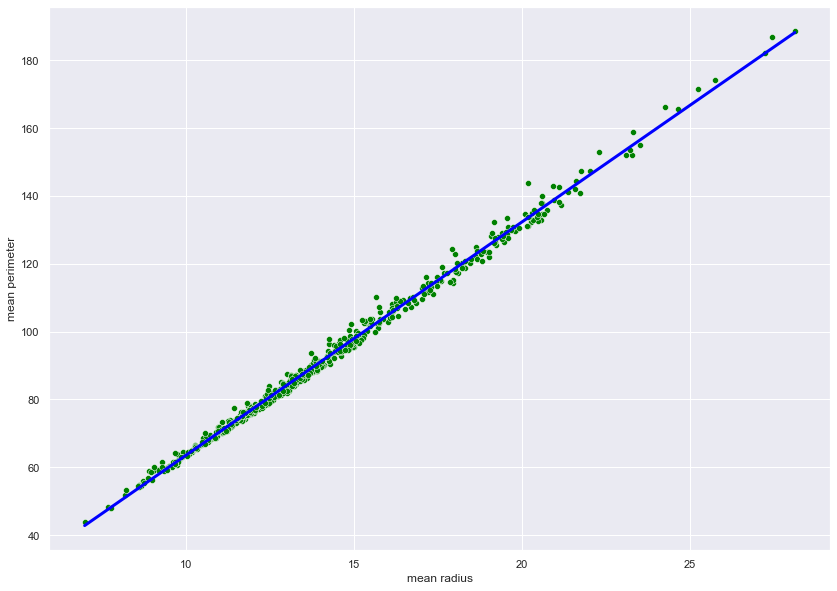

In [255]:
#mean perimeter synthetic data
#https://www.statology.org/line-of-best-fit-python/
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,2])

a, b = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(a,b))

sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,2], color='green')

sns.lineplot(x=x, y=a*x+b, color='blue', linestyle='-', linewidth=3)

In [254]:
#synthetic perimeter data
per = rad*a + b
print(per)

[140.344506   123.72806245  57.47380374  92.219391    99.44290232
  75.29241146 108.8410208   79.26884213 117.34732259  43.46079047
 113.04798008  93.38641364 102.27474197  75.09309349  64.46901665
  54.71576118 106.02081781  81.73913881 108.6285637   96.88590032
  99.92352111 148.50042625 124.98148249  86.77300144  92.62808403
 135.78364047  70.80559356  76.46362915 100.22265346  41.26173432
  88.9917045  107.82547169  51.58808393 119.9833264   97.33053205
  75.05837245  48.94572099  83.22023798 107.84797512  96.91544262
  66.99805595 114.35121549  45.59605429  83.9184699  130.47533357
  95.65310295 128.161937    73.63722341  72.91935624  98.45919114
  60.10005906  89.69913426 119.31312374  87.58659323  79.63048392
  64.65113656  85.93702616  82.70999576  88.64386992 109.89990405
 156.87649783  94.5578148  149.75771691 108.14066531  93.22693875
  89.35591796  87.93156745  82.71617014 125.07814847  97.06661338
  97.73887077  84.60621515  77.16349503  69.14357124  78.80045251
  98.37690

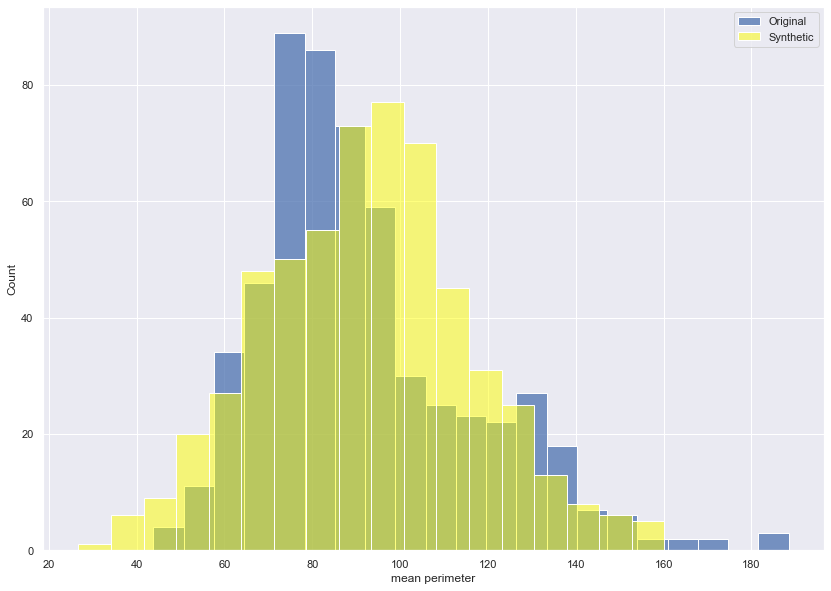

In [256]:
plt.figure()
sns.histplot(df.iloc[:,2])
sns.histplot(per, color='yellow', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

Best fit line is y = 98.59821921514536x + (-738.0367041957494)


<AxesSubplot:xlabel='mean radius', ylabel='mean area'>

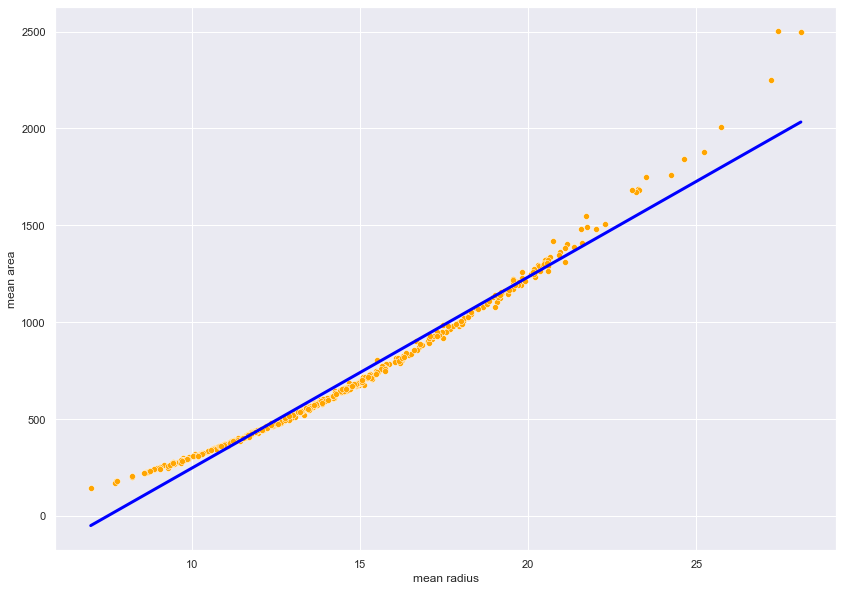

In [105]:
#mean area synthetic data
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,3])

c, d = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(c,d))

sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,3], color='orange')

sns.lineplot(x=x, y=c*x+d, color='blue', linestyle='-', linewidth=3)

As the area isn't quite as well correlated, we can add a small amount of noise to represent the deviation from line. We can choose the standard deviation of the noise value by trial and error, seeing the effect it has on the correlation calculated for the synthetic data.

In [258]:
#synthetic area data
noise = rng.normal(0, 90, 569)
area = abs(rad*c + d + noise)
print(df.iloc[:,3])
print(area)

0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: mean area, Length: 569, dtype: float64
[1575.89030159 1036.36870299  146.94518906  635.39284068  859.22874848
  426.51636418 1043.60492557  422.5460194  1194.79209456   73.47393875
 1056.94088451  733.335704    734.64695162  330.34496838  518.65614071
  156.75393887  763.71943097  575.40850093  830.5985833   761.61543348
  763.34438618 1520.89310095 1215.66182089  600.21746689  734.94485716
 1493.46222132  483.7403159   469.50405622  776.4355726    92.20258591
  492.73581011  849.83347307   39.73796765 1152.02656753  844.60193879
  461.58161432   44.21927079  713.44816443  849.75280516  786.53368759
  314.49757776 1121.74617451  143.07053104  624.48810218 1208.68180956
  661.97674537 1133.79164139  410.33553382  434.11371329  803.47298589
  295.0822724   749.70252377 1109.22335755  645.85268855  324.5650802
  336.00868609  527.5

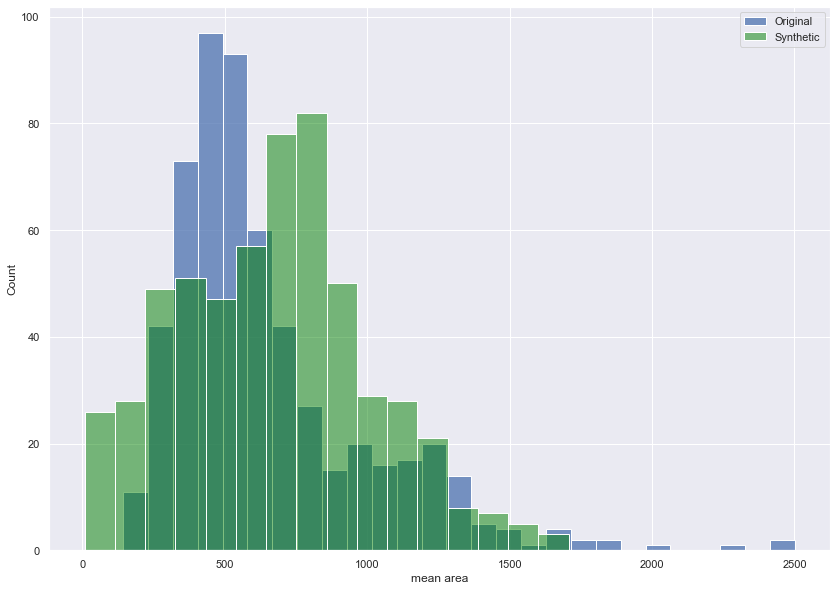

In [259]:
plt.figure()
sns.histplot(df.iloc[:,3])
sns.histplot(area, color='green', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

We can also see that mean concave points correlate strongly with the mean radius, perimeter and area. If we can determine the approximate relationship between concave points, we can model this attribute based on our radius synthetic data.

Best fit line is y = 0.009056754948745952x + (-0.07902827350772049)


<AxesSubplot:xlabel='mean radius', ylabel='mean concave points'>

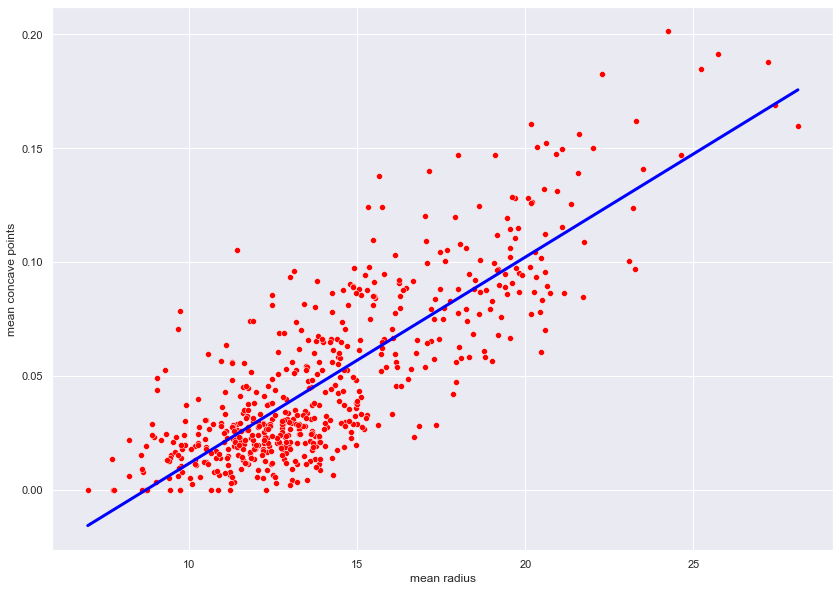

In [262]:
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,7])

e, f = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(e,f))

sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,7], color='red')

sns.lineplot(x=x, y=e*x+f, color='blue', linestyle='-', linewidth=3)

So we have established an approximate linear relationship between the radius and concave points. We can use this to generate the synthetic concave points data. We will also need to add a noise variable as we do not want the data to correlate exactly. We need to keep the correlation at about 0.82.

In [263]:
#mean concave points synthetic data
noise = rng.normal(0, 0.02, 569)
conp = abs(rad*e + f + noise)
print(conp)

[1.31836632e-01 7.77410445e-02 4.10845529e-03 3.42781092e-02
 5.97007051e-02 2.26896827e-02 9.90381782e-02 4.32010970e-02
 8.75375385e-02 2.66932505e-02 8.77462039e-02 8.76310424e-03
 6.13230734e-02 3.24571233e-02 1.09121554e-02 3.28502384e-03
 1.19478566e-01 2.05504733e-02 1.15201416e-01 6.39656040e-02
 1.11900189e-01 1.22283936e-01 6.98886831e-02 2.98839995e-03
 3.02866925e-02 1.12088689e-01 2.13911642e-02 3.05645611e-02
 8.78068394e-02 7.06233445e-03 6.25123625e-02 8.39853444e-02
 1.40627717e-02 9.19584242e-02 7.08474514e-02 2.46545212e-02
 3.66325438e-02 6.01196438e-02 8.27865599e-02 5.32780139e-02
 8.74054307e-03 4.59097989e-02 2.53476217e-02 6.34611597e-02
 1.24287345e-01 8.06255338e-02 7.31418185e-02 3.01159557e-02
 1.23585728e-02 6.37120870e-02 6.96752516e-04 2.41336826e-02
 1.37488286e-01 4.80942173e-02 5.30435403e-02 1.32523981e-02
 6.35804159e-02 7.48707514e-02 4.96065682e-02 6.90901756e-02
 1.32367390e-01 7.84287092e-02 1.24035220e-01 1.00113882e-01
 2.61748524e-02 5.197600

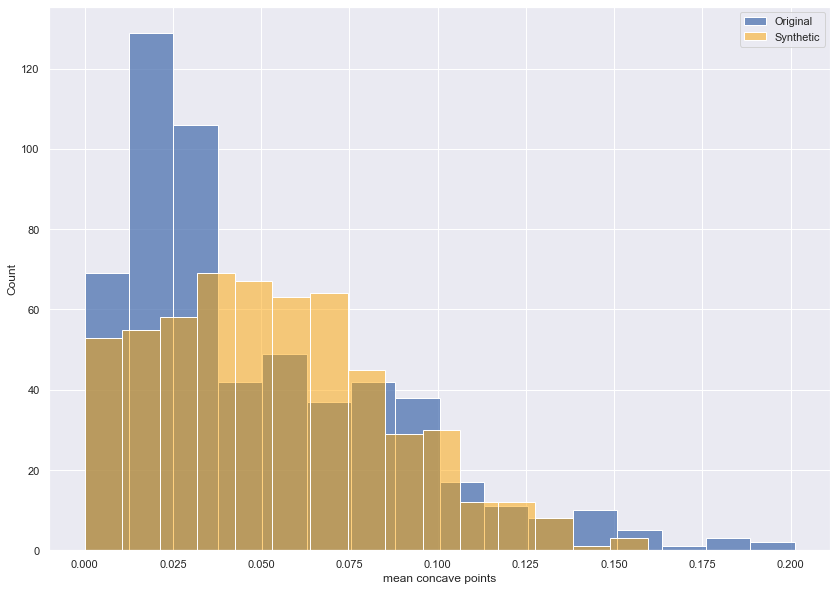

In [265]:
plt.figure()
sns.histplot(df.iloc[:,7])
sns.histplot(conp, color='orange', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

When we examine concave points relationship with other attributes, we find that compactness and concavity are highly correlated with it. We will use this as the basis of the synthetic data for these two attributes.

Best fit line is y = 1.1312194763444867x + (0.049002693608555456)


<AxesSubplot:xlabel='mean concave points', ylabel='mean compactness'>

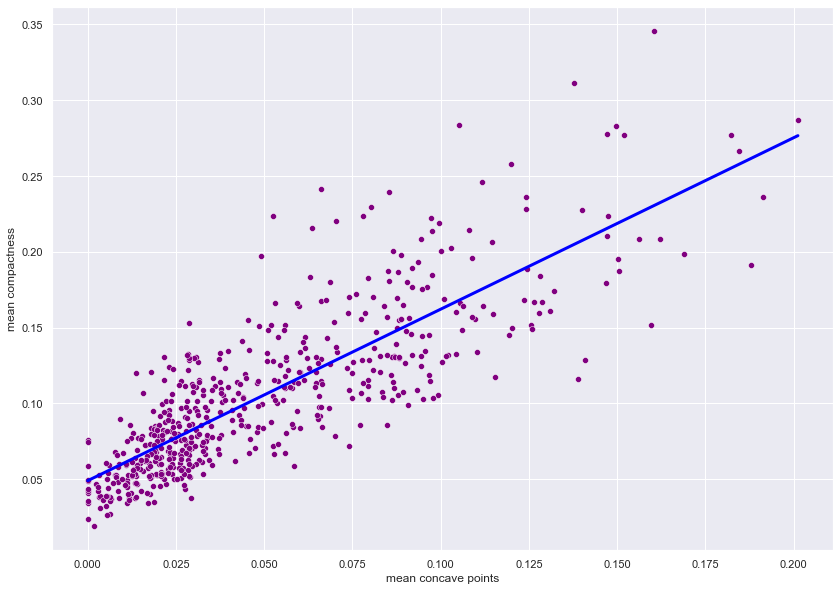

In [266]:
#mean compactness synthetic data
x = np.array(df.iloc[:,7])
y = np.array(df.iloc[:,5])

g, h = np.polyfit(x, y, 1)
print('Best fit line is y = {}x + ({})'.format(g,h))

sns.scatterplot(x=df.iloc[:,7], y=df.iloc[:,5], color='purple')

sns.lineplot(x=x, y=g*x+h, color='blue', linestyle='-', linewidth=3)

In [297]:
#compactness
noise = rng.normal(0, 0.027, 569)
comp = conp*g + h + noise
print(comp)

[ 2.22205107e-01  1.72226340e-01  2.88353100e-02  7.36287443e-02
  6.11751944e-02  9.92637842e-02  1.51614463e-01  1.18066720e-01
  1.29065639e-01  8.16063606e-02  1.57590771e-01  6.10630833e-02
  8.85484346e-02  4.81315586e-02  7.70564855e-03  7.18195009e-02
  1.88904787e-01  7.98414861e-02  1.74974100e-01  1.10692634e-01
  1.61822670e-01  1.47149839e-01  1.01537620e-01  2.84571677e-02
  4.85170111e-02  1.41903962e-01  9.83724799e-02  5.34757928e-02
  1.18034458e-01  4.72727123e-02  9.27215777e-02  9.62035667e-02
  2.24119392e-02  1.53212102e-01  1.61639392e-01  7.27212786e-02
  7.83203553e-02  7.70934393e-02  1.23748728e-01  1.02567051e-01
  3.73669956e-02  1.15655934e-01  7.55679567e-02  8.07895300e-02
  1.60450317e-01  1.06933847e-01  1.19440403e-01  8.42499231e-02
  1.01343699e-01  1.30941067e-01  3.71824261e-02  6.84246655e-02
  1.87547753e-01  6.50357083e-02  8.02407535e-02  3.75877498e-02
  1.30450996e-01  1.23711327e-01  1.22571024e-01  1.26356560e-01
  1.84016303e-01  8.38038

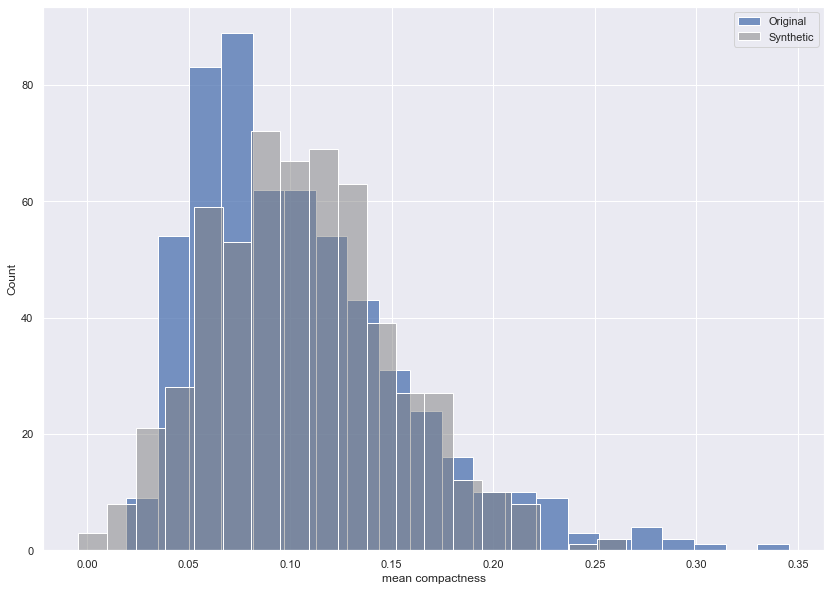

In [298]:
plt.figure()
sns.histplot(df.iloc[:,5])
sns.histplot(comp, color='grey', alpha=0.5)
plt.legend(['Original', 'Synthetic'])

Similarly we could generate data for concavity from mean concave points. Smoothness is not quite as well correlated with other attributes. It is aligned most with compactness. Synthetic data could be derived using compactness and a high level of noise. Symmetry and fractal dimension are less correlated again but could be derived from the smoothness. Texture appears to be uncorrelated to all other attributes and would probably be best modeled as an independent random distribution. Mean texture is normally distributed so this would be straightforward to model using the mean and standard deviation from the original dataset. While we focused on the mean values here, the same approach can be applied to the standard error and max values.

Using the five attributes we have generated synthetic data for, we can now create a heatmap to see if we have been able to maintain the relationships between the variables.

In [311]:
synData = np.transpose([rad, per, area, comp, conp])

In [312]:
#generate a dataframe using the numpy arrays created above
synDataDf = pd.DataFrame(synData, columns=['mean radius', 'mean perimeter', 'mean area', 'mean compactness', 'mean concave points'])

In [313]:
synDataDf

,mean radius,mean perimeter,mean area,mean compactness,mean concave points
0,21.158201,140.344506,1575.890302,0.222205,0.131837
1,18.743161,123.728062,1036.368703,0.172226,0.077741
2,9.113742,57.473804,146.945189,0.028835,0.004108
3,14.163679,92.219391,635.392841,0.073629,0.034278
4,15.213547,99.442902,859.228748,0.061175,0.059701
...,...,...,...,...,...
564,10.837601,69.334643,160.632794,0.132033,0.051282
565,14.806118,96.639627,672.557898,0.117285,0.057439
566,19.864465,131.443085,1173.445587,0.147274,0.080792
567,17.433263,114.715439,1037.592226,0.168479,0.091547


Text(0.5, 1.0, 'Synthetic dataset')

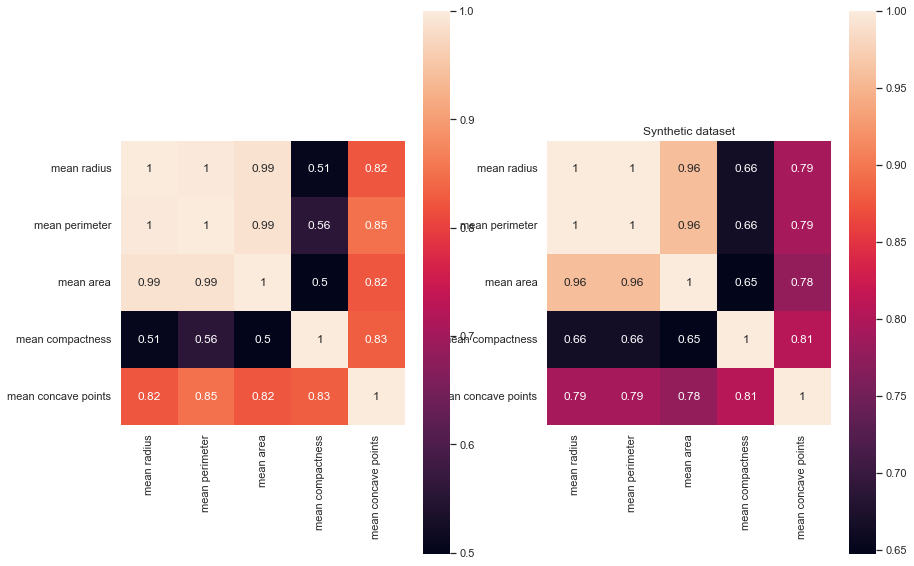

In [314]:
#https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side

fig, (ax1, ax2) = plt.subplots(1,2)

sns.heatmap(df.iloc[:,[0,2,3,5,7]].corr(), vmax=1, square=True, annot=True, ax=ax1)
sns.heatmap(synDataDf.iloc[:,0:10].corr(), vmax=1, square=True, annot=True, ax=ax2)
plt.title('Synthetic dataset')

The correlation in the synthetic data is quite close to the original data. This should prove useful data to train a machine learning model on. 

## References

UCI Machine Learning (2017) Breast Cancer Wisconsin (Diagnostic) Data Set. Available at: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?resource=download (Accessed: 6 December 2022)  
  
Sinha, S. (2017) Visualising the Breast Cancer Wisconsin Data Set. Available at: https://www.kaggle.com/code/djokester/visualising-the-breast-cancer-wisconsin-data-set/notebook (Accessed: 7 December 2022)  
  
Scikit-learn.org (2022). sklearn.datasets.load_breast_cancer. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html (Accessed 6 December 2022)  
  
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.  
  
Abien Fred M. Agarap. 2018. On breast cancer detection: an application of machine learning algorithms on the wisconsin diagnostic dataset. In Proceedings of the 2nd International Conference on Machine Learning and Soft Computing (ICMLSC '18). Association for Computing Machinery, New York, NY, USA, 5–9. https://doi.org/10.1145/3184066.3184080  
  
R. Fitrah Umami and R. Sarno, "Analysis of Classification Algorithm for Wisconsin Diagnosis Breast Cancer Data Study," 2020 International Seminar on Application for Technology of Information and Communication (iSemantic), 2020, pp. 464-469, doi: 10.1109/iSemantic50169.2020.9234295.    
  
Scikit-learn.org (2022) Support Vector Machines. Available at: https://scikit-learn.org/stable/modules/svm.html (Accessed: 20 December 2022)  
  
Scikit-learn.org (2022) Decision Tree. Available at: https://scikit-learn.org/stable/modules/tree.html# (Accessed: 20 December 2022)  
  
StackOverflow.com (2018) Plot two seaborn heatmap graphs side by side. Available at: https://stackoverflow.com/questions/50947776/plot-two-seaborn-heatmap-graphs-side-by-side (Accessed: 20 December 2022)  
  
Statology.com (2021) How to Plot Line of Best Fit in Python. Available at: https://www.statology.org/line-of-best-fit-python/ (Accessed on: 15 January 2022)